In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('data.csv',header = None)
df.head()

,0,1
0,-0.593257,0.326039
1,-0.050397,1.095127
2,1.685130,-0.074212
3,0.331759,0.814348
4,1.918354,0.024507


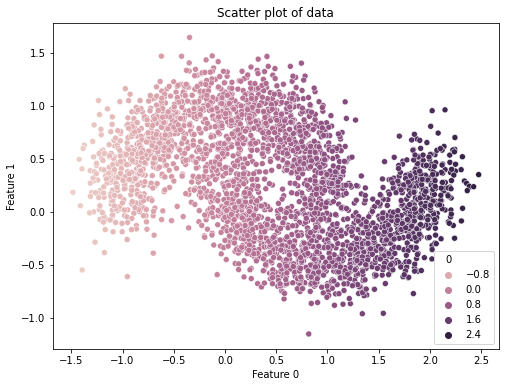

In [9]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=df, x=df[0], y=df[1],hue = 0)
ax.set(xlabel="Feature 0", ylabel="Feature 1", title="Scatter plot of data")
# ax.legend(title="Class Labels")
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [11]:
# from sklearn.model_selection import train_test_split = train_test_split()
X_train = df.sample(frac = 0.7)
X_test = df.drop(X_train.index)

In [15]:
model = KMeans(n_clusters=4)
model = model.fit(X_train)

In [16]:
pred = model.predict(X_test)

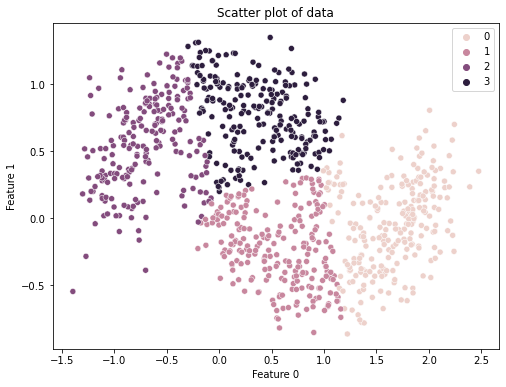

In [17]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=X_test, x=0, y=1,hue = pred)
ax.set(xlabel="Feature 0", ylabel="Feature 1", title="Scatter plot of data")
# ax.legend(title="Class Labels")
plt.show()

### Using MeanShift or Hierarchial clustering

In [72]:
from sklearn.cluster import MeanShift

In [73]:
ms = MeanShift()
ms.fit(X_train)
cluster_centers = ms.cluster_centers_
labels = ms.labels_

In [74]:
cluster_centers

array([[0.60295864, 0.09094816]])


> Using SVM with rbf
It wont works since it requires a class label

In [75]:
# from sklearn.svm import SVC

In [76]:
# sv = SVC.fit(X_train)

> Using Gaussian Mixture models

In [77]:
from sklearn.mixture import GaussianMixture

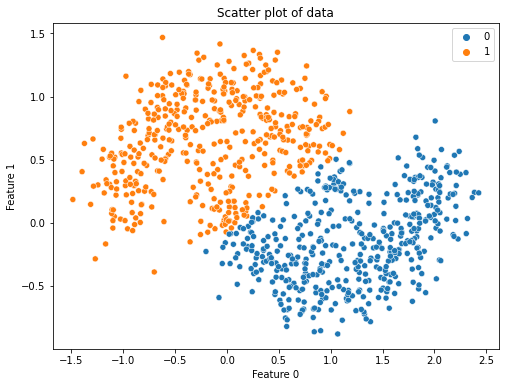

In [84]:
GMM = GaussianMixture(n_components=2,init_params='kmeans',max_iter=2000,n_init=5).fit(X_train)

pred = GMM.predict(X_test)
# pred

plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=X_test, x=0, y=1,hue = pred)
ax.set(xlabel="Feature 0", ylabel="Feature 1", title="Scatter plot of data")
# ax.legend(title="Class Labels")
plt.show()

> Using Transformations to spherical coordinates

$\theta = arctan(x,y) $ and r = $\sqrt{x^2 + y^2}$

In [85]:
dft = pd.DataFrame()
# dft['x'] = df[0].copy()
# dft['y'] = df[1].copy()
dft['f1'] = np.arctan(df[1]/df[0])
dft['f2'] = np.sqrt(df[1] **2 + df[0]** 2 )
dft['f3'] = df[0]*np.log(np.abs(df[1]))
# dft['f2'] = df[1] **2 + df[0]** 2 

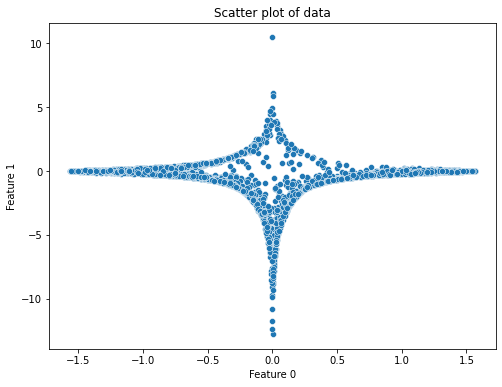

In [86]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=dft, x='f1', y='f3')
ax.set(xlabel="Feature 0", ylabel="Feature 1", title="Scatter plot of data")
# ax.legend(title="Class Labels")
plt.show()

In [87]:
# X_train = dft.sample(frac = 0.7)
# X_test = dft.drop(X_train.index)
X_traint = dft.iloc[X_train.index]
X_testt =  dft.iloc[X_test.index]

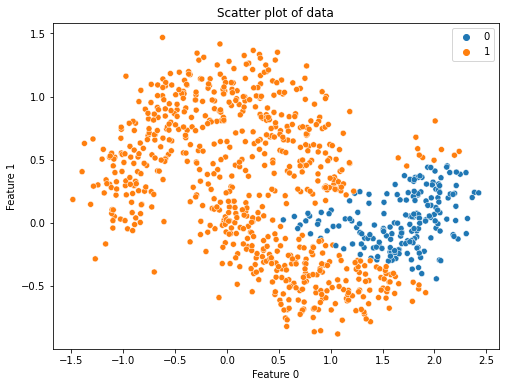

In [88]:
model = KMeans(n_clusters=2)
model = model.fit(X_traint)
pred = model.predict(X_testt)
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=X_test, x=0, y=1,hue = pred)
ax.set(xlabel="Feature 0", ylabel="Feature 1", title="Scatter plot of data")
# ax.legend(title="Class Labels")
plt.show()

## Trying Nysteroem transformation

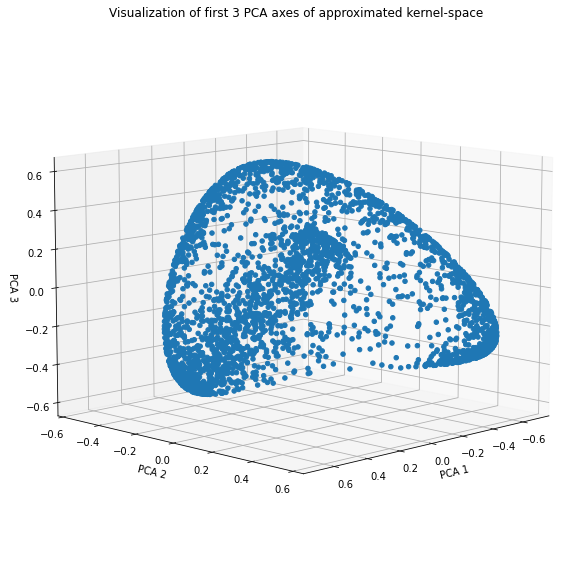

In [20]:
from scipy.linalg import svd

def nystroem_transformation(X, k, kernel_function):
    
    random_sample_indices = np.random.choice(X.shape[0], k)
    
    C = kernel_function(X, X[random_sample_indices])
    
    W = C[random_sample_indices]
       
    # Calculating mapping_matrix = W^(-1/2)
    U, S, V = svd(W)
    mapping_matrix = np.linalg.pinv( U * np.sqrt(S) @ V ).T
    
    return C @ mapping_matrix

X = df.values

from sklearn.kernel_approximation import pairwise_kernels

gamma = 1/( 2*X.var() )

rbf_kernel = lambda A,B : pairwise_kernels(A, B, metric="rbf", gamma=gamma)

X.shape

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

Phi = nystroem_transformation(X, k=100, kernel_function=rbf_kernel)

Phi_3D = PCA(n_components=3).fit_transform(Phi)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Phi_3D[:,0], Phi_3D[:,1], Phi_3D[:,2], cmap="Accent", alpha=1)
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
ax.set_title("Visualization of first 3 PCA axes of approximated kernel-space")

ax.view_init(10, 45)
plt.show()

In [21]:
Phi_3D.shape

(3000, 3)

In [37]:
dft1 = pd.DataFrame(Phi_3D)
X_traint1 = dft1.sample(frac = 0.7)
X_testt1 = dft1.drop(X_traint1.index)
# X_traint = dft.iloc[X_train.index]
X_testt =  df.iloc[X_testt1.index]

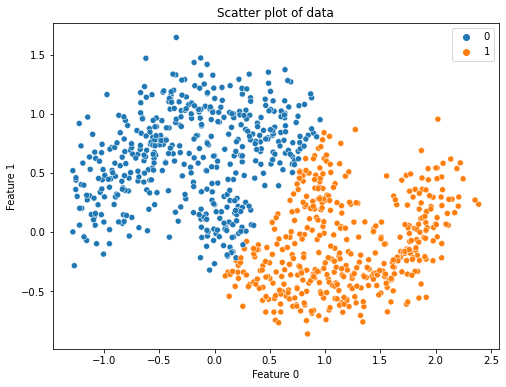

In [47]:
model = KMeans(n_clusters=2)
model = model.fit(Phi_3D)
pred = model.predict(X_testt1)
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=X_testt, x=0, y=1,hue = pred)
ax.set(xlabel="Feature 0", ylabel="Feature 1", title="Scatter plot of data")
# ax.legend(title="Class Labels")
plt.show()

> Random -> Substracting from the centroids

In [24]:
df.head()

,0,1
0,-0.593257,0.326039
1,-0.050397,1.095127
2,1.685130,-0.074212
3,0.331759,0.814348
4,1.918354,0.024507


In [179]:
dfr = pd.DataFrame()
meanx = df[0].mean()
meany = df[1].mean()
dfr[2] = np.sqrt(np.abs(meanx**2 - df[0]**2))
dfr[0] = np.abs(meanx - df[0])
dfr[1]=np.abs(df[1]+df[0])

In [180]:
np.mean(df.values,axis = 0)

array([0.48910405, 0.25270531])

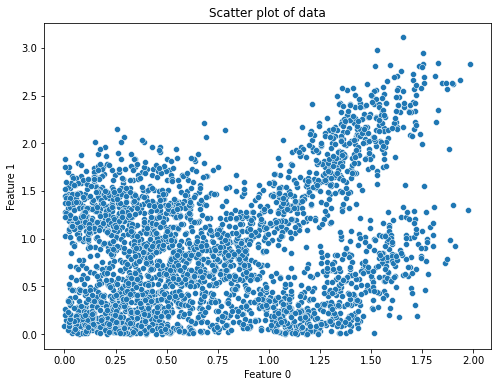

In [181]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=dfr, x=0, y=1)
ax.set(xlabel="Feature 0", ylabel="Feature 1", title="Scatter plot of data")
# ax.legend(title="Class Labels")
plt.show()

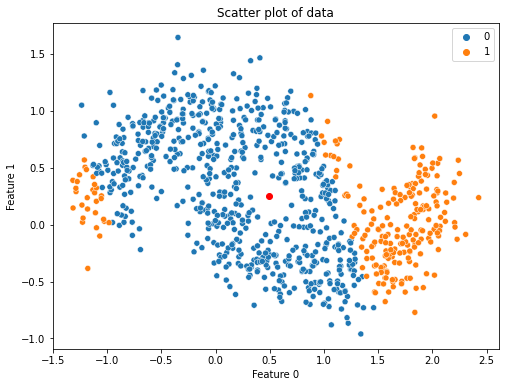

In [182]:
X_trainr = dfr.sample(frac = 0.7)
X_testr = dfr.drop(X_trainr.index)
# X_traint = dft.iloc[X_train.index]
X_testt =  df.iloc[X_testr.index]
model = KMeans(n_clusters=2)
model = model.fit(X_trainr)
pred = model.predict(X_testr)
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=X_testt, x=0, y=1,hue = pred)
# ax2 = sns.scatterplot(data=X_testr, x=0, y=1,hue = pred)
ax.set(xlabel="Feature 0", ylabel="Feature 1", title="Scatter plot of data")
# ax.legend(title="Class Labels")
plt.scatter(meanx,meany,c='r')
plt.show()

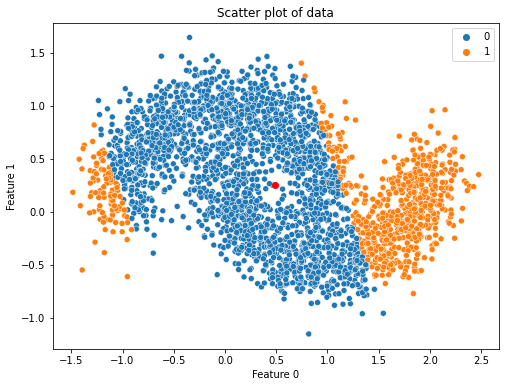

In [183]:
# X_trainr = dfr.sample(frac = 0.7)
# X_testr = dfr.drop(X_trainr.index)
# X_traint = dft.iloc[X_train.index]
# X_testt =  df.iloc[X_testr.index]
model = KMeans(n_clusters=2)
model = model.fit(dfr)
pred = model.predict(dfr)
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=df, x=0, y=1,hue = pred)
# ax2 = sns.scatterplot(data=X_testr, x=0, y=1,hue = pred)
ax.set(xlabel="Feature 0", ylabel="Feature 1", title="Scatter plot of data")
# ax.legend(title="Class Labels")
plt.scatter(meanx,meany,c='r')
plt.show()

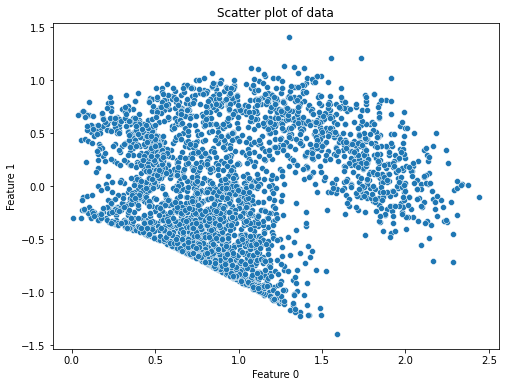

In [173]:
dfr = pd.DataFrame()
meanx = df[0].mean()
meany = df[1].mean()
# dfr[0] = np.sqrt(np.abs(df[0]**2 - df[0].mean()**2))
dfr[0] = np.sqrt(np.abs((df[0]**2 - df[0].mean()**2)+(df[1]**2 - df[1].mean()**2)))
dfr[1] = meany - df[1] 
# dfr[0] =np.sin(df[0])*np.cos(df[1])
# dfr[0] = np.sqrt(np.abs(df[0]**2 - df[0].mean()**2))

plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=dfr, x=0, y=1)
ax.set(xlabel="Feature 0", ylabel="Feature 1", title="Scatter plot of data")
# ax.legend(title="Class Labels")
plt.show()

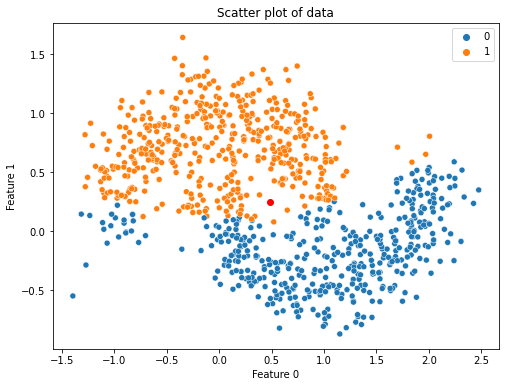

In [469]:
X_trainr = dfr.sample(frac = 0.7)
X_testr = dfr.drop(X_trainr.index)
# X_traint = dft.iloc[X_train.index]
X_testt =  df.iloc[X_testr.index]
model = KMeans(n_clusters=2)
model = model.fit(X_trainr)
pred = model.predict(X_testr)
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=X_testt, x=0, y=1,hue = pred)
# ax2 = sns.scatterplot(data=X_testr, x=1, y=2,hue = pred)
ax.set(xlabel="Feature 0", ylabel="Feature 1", title="Scatter plot of data")
# ax.legend(title="Class Labels")
plt.scatter(meanx,meany,c='r')
plt.show()

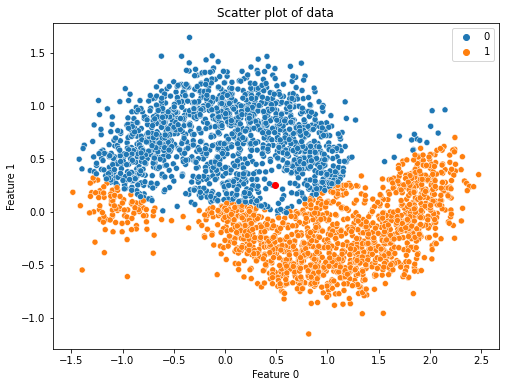

In [470]:
# X_trainr = dfr.sample(frac = 0.7)
# X_testr = dfr.drop(X_trainr.index)
# X_traint = dft.iloc[X_train.index]
# X_testt =  df.iloc[X_testr.index]
model = KMeans(n_clusters=2)
model = model.fit(dfr)
pred = model.predict(dfr)
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=df, x=0, y=1,hue = pred)
# ax2 = sns.scatterplot(data=X_testr, x=0, y=1,hue = pred)
ax.set(xlabel="Feature 0", ylabel="Feature 1", title="Scatter plot of data")
# ax.legend(title="Class Labels")
plt.scatter(meanx,meany,c='r')
plt.show()

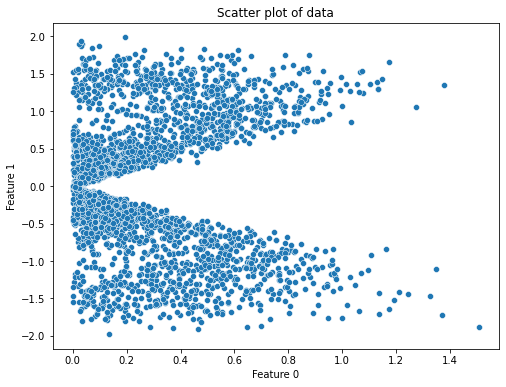

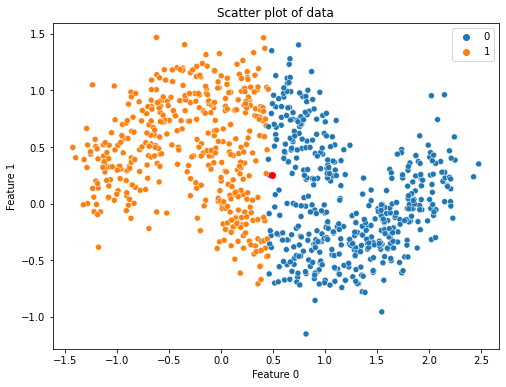

In [431]:
dfr = pd.DataFrame()
meanx = df[0].mean()
meany = df[1].mean()
# dfr[0] = np.sqrt(np.abs(df[0]**2 - df[0].mean()**2))
dfr[1] = (df[0] - df[0].mean())
# dfr[2] = (df[1] - df[1].mean())
dfr[0] = np.abs(df[0]-meanx) * np.abs(df[1]-meany)
# dfr[1] =np.sqrt(np.abs(df[0]**2 - df[0].mean()**2))
# dfr[2] = df[0]**2
# dfr[3] = df[1]**2

plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=dfr, x=0, y=1)
ax.set(xlabel="Feature 0", ylabel="Feature 1", title="Scatter plot of data")
# ax.legend(title="Class Labels")
plt.show()

X_trainr = dfr.sample(frac = 0.7)
X_testr = dfr.drop(X_trainr.index)
# X_traint = dft.iloc[X_train.index]
X_testt =  df.iloc[X_testr.index]
model = KMeans(n_clusters=2)
model = model.fit(X_trainr)
pred = model.predict(X_testr)
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=X_testt, x=0, y=1,hue = pred)
# ax2 = sns.scatterplot(data=X_testr, x=1, y=2,hue = pred)
ax.set(xlabel="Feature 0", ylabel="Feature 1", title="Scatter plot of data")
# ax.legend(title="Class Labels")
plt.scatter(meanx,meany,c='r')
plt.show()

In [432]:
import scipy
from scipy.cluster import hierarchy
import sklearn

In [433]:
clusters = hierarchy.linkage(df, method="complete")

clusters[:10]

array([[6.91000000e+02, 2.91300000e+03, 1.08637090e-04, 2.00000000e+00],
       [1.59900000e+03, 2.57400000e+03, 2.23464037e-04, 2.00000000e+00],
       [2.25000000e+02, 1.44600000e+03, 5.39874063e-04, 2.00000000e+00],
       [1.90900000e+03, 2.77200000e+03, 6.73440003e-04, 2.00000000e+00],
       [2.70000000e+01, 1.58100000e+03, 8.07595163e-04, 2.00000000e+00],
       [4.80000000e+01, 1.53700000e+03, 1.13864863e-03, 2.00000000e+00],
       [1.83200000e+03, 2.53900000e+03, 1.52811674e-03, 2.00000000e+00],
       [3.38000000e+02, 1.78700000e+03, 1.55972648e-03, 2.00000000e+00],
       [1.37300000e+03, 1.59300000e+03, 1.57460386e-03, 2.00000000e+00],
       [1.39900000e+03, 2.83700000e+03, 1.63470039e-03, 2.00000000e+00]])

In [434]:
def plot_dendrogram(clusters):
    plt.figure(figsize=(20,6))
    dendrogram = hierarchy.dendrogram(clusters, labels=Y, orientation="top",leaf_font_size=9, leaf_rotation=360)
    plt.ylabel('Euclidean Distance');

plot_dendrogram(clusters)

NameError: name 'Y' is not defined

<Figure size 1440x432 with 0 Axes>

In [ ]:
"euclidean", "l1", "l2",
    "manhattan", "cosine", or "precomputed".
    {'ward', 'complete', 'average', 'single'}

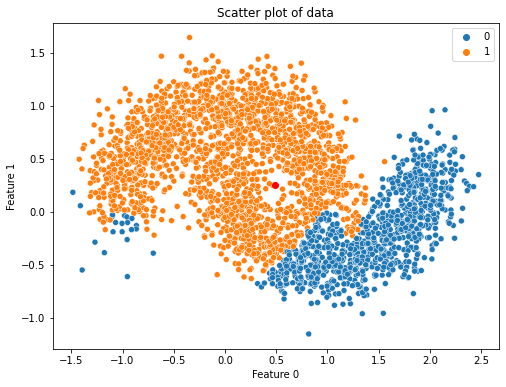

In [473]:
from sklearn.cluster import AgglomerativeClustering

dfr = pd.DataFrame()
meanx = df[0].mean()
meany = df[1].mean()
# dfr[0] = np.sqrt(np.abs(meanx**2 - df[0]**2))
dfr[0] = np.sqrt(np.abs((df[0]**2 - df[0].mean()**2)+(df[1]**2 - df[1].mean()**2)))
# dfr[1] = meanx - df[1]
dfr[1]=meany - df[1]
clustering = AgglomerativeClustering(n_clusters=2, linkage="average",affinity="manhattan")
Y_preds = clustering.fit_predict(dfr)

Y_preds

plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=df, x=0, y=1,hue = Y_preds)
# ax2 = sns.scatterplot(data=X_testr, x=1, y=2,hue = pred)
ax.set(xlabel="Feature 0", ylabel="Feature 1", title="Scatter plot of data")
# ax.legend(title="Class Labels")
plt.scatter(meanx,meany,c='r')
plt.show()


 The cluster labels generated by the given agglomerative clustering technique is: 
[1 1 0 ... 0 1 1]


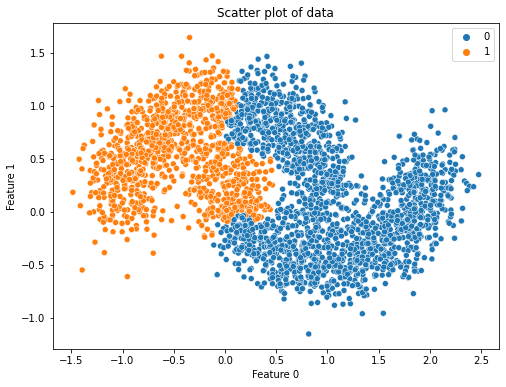

In [14]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage='average',n_clusters =2).fit(df)
print('\n The cluster labels generated by the given agglomerative clustering technique is: ')
pred = clustering.labels_
print(clustering.labels_)

plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=df, x=0, y=1,hue = pred)
# ax2 = sns.scatterplot(data=X_testr, x=1, y=2,hue = pred)
ax.set(xlabel="Feature 0", ylabel="Feature 1", title="Scatter plot of data")
# ax.legend(title="Class Labels")
# plt.scatter(meanx,meany,c='r')
plt.show()

In [18]:
from sklearn.cluster import kmeans_plusplus
centers_init, indices = kmeans_plusplus(df.values, n_clusters=2, random_state=0)
# model = model.fit(X_train)

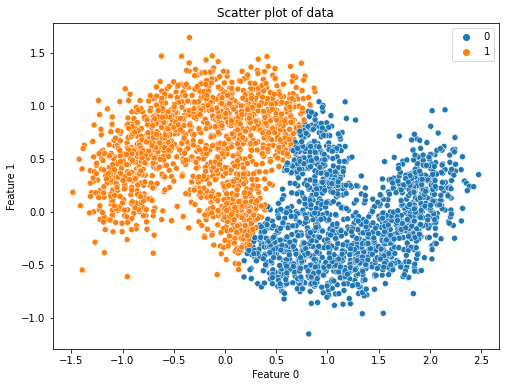

In [25]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2,init = 'k-means++',n_init=50).fit(df)
pred = model.predict(df)
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=df, x=0, y=1,hue = pred)
# ax2 = sns.scatterplot(data=X_testr, x=1, y=2,hue = pred)
ax.set(xlabel="Feature 0", ylabel="Feature 1", title="Scatter plot of data")
# ax.legend(title="Class Labels")
# plt.scatter(meanx,meany,c='r')
plt.show()

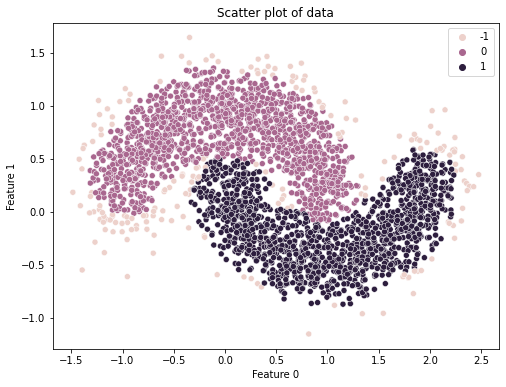

In [93]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps = 0.2,min_samples=75).fit(df)
pred = model.labels_
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=df, x=0, y=1,hue = pred)
# ax2 = sns.scatterplot(data=X_testr, x=1, y=2,hue = pred)
ax.set(xlabel="Feature 0", ylabel="Feature 1", title="Scatter plot of data")
# ax.legend(title="Class Labels")
# plt.scatter(meanx,meany,c='r')
plt.show()

In [94]:
pd.DataFrame(pred).value_counts()

 1    1409
 0    1395
-1     196
dtype: int64

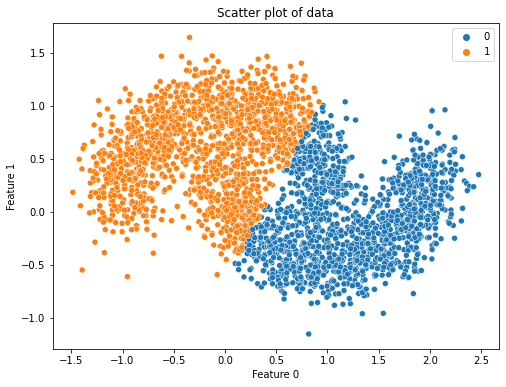

In [48]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters = 2,eigen_solver='arpack',assign_labels='discretize').fit(df)
pred = model.labels_
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=df, x=0, y=1,hue = pred)
# ax2 = sns.scatterplot(data=X_testr, x=1, y=2,hue = pred)
ax.set(xlabel="Feature 0", ylabel="Feature 1", title="Scatter plot of data")
# ax.legend(title="Class Labels")
# plt.scatter(meanx,meany,c='r')
plt.show()

In [198]:
from sklearn.preprocessing import StandardScaler
dfr = pd.DataFrame()

dfn = StandardScaler().fit_transform(df)
dfn = pd.DataFrame(dfn)
meanx = dfn[0].mean()
meany = dfn[1].mean()
dfr = df.copy()
for i in range(len(dfn)):
    if dfn[0][i] - meanx >0.3 and  dfn[0][i] -meanx <0.7:
        dfr[0][i] = -10
    elif dfn[0][i] -meanx > 0.7:
        dfr[0][i] = 10
    elif dfn[0][i] - meanx < -0.3 and  dfn[0][i] -meanx > -0.7:
        dfr[0][i] = 10
    else :
        dfr[0][i] = -10
dfr
# dfr[0] = [-10  if meanx - dfn[0][i] >0.7 and meanx - dfn[0][i] < 1.3 else 10 for i in range(len(dfn))]
# dfr[1] = (df[0] - df[0].mean())

,0,1
0,-10.0,0.326039
1,10.0,1.095127
2,10.0,-0.074212
3,-10.0,0.814348
4,10.0,0.024507
...,...,...
2995,-10.0,0.745716
2996,10.0,0.489719
2997,-10.0,-0.325878
2998,-10.0,0.358632


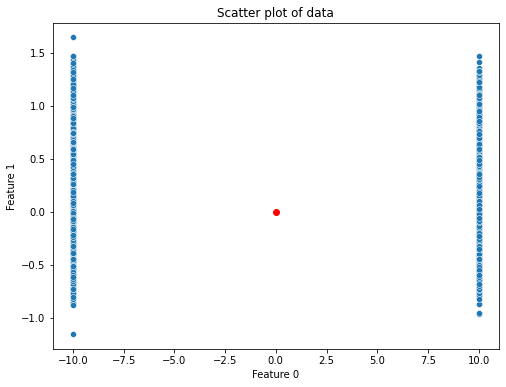

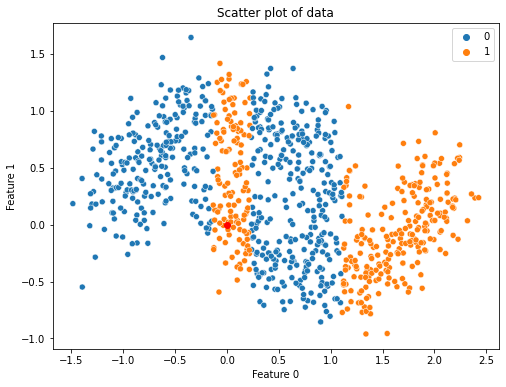

In [199]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=dfr, x=0, y=1)
plt.scatter(meanx,meany,c='r')
ax.set(xlabel="Feature 0", ylabel="Feature 1", title="Scatter plot of data")
# ax.legend(title="Class Labels")
plt.show()

X_trainr = dfr.sample(frac = 0.7)
X_testr = dfr.drop(X_trainr.index)
# X_traint = dft.iloc[X_train.index]
X_testt =  df.iloc[X_testr.index]
model = KMeans(n_clusters=2)
model = model.fit(X_trainr)
pred = model.predict(X_testr)
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=X_testt, x=0, y=1,hue = pred)
# ax2 = sns.scatterplot(data=X_testr, x=1, y=2,hue = pred)
ax.set(xlabel="Feature 0", ylabel="Feature 1", title="Scatter plot of data")
# ax.legend(title="Class Labels")
plt.scatter(meanx,meany,c='r')
plt.show()

In [200]:
df

,0,1
0,-0.593257,0.326039
1,-0.050397,1.095127
2,1.685130,-0.074212
3,0.331759,0.814348
4,1.918354,0.024507
...,...,...
2995,0.367553,0.745716
2996,1.774294,0.489719
2997,0.666761,-0.325878
2998,-1.255312,0.358632


In [205]:
df = pd.read_csv('data.csv',header = None)
df.head()

,0,1
0,-0.593257,0.326039
1,-0.050397,1.095127
2,1.685130,-0.074212
3,0.331759,0.814348
4,1.918354,0.024507


In [215]:
from sklearn.preprocessing import StandardScaler
dfr = pd.DataFrame()

dfn = StandardScaler().fit_transform(df)
dfn = pd.DataFrame(dfn)
meanx = dfn[0].mean()
meany = dfn[1].mean()
dfr = df.copy()
dfr[1] = dfn[1] - meany
dfr[0] = dfn[0] - meanx
# df[1].sort

In [231]:
y = dfr[1].sort_values(ascending=False)
x = dfr[0].sort_values(ascending=False)
y1= y[y.index[0]]
y2= y[y.index[-1]]
x2= x[x.index[0]]
x1= x[x.index[-1]]
center1 = np.array([x1,y1])
center2 = np.array([x2,y2])

In [234]:
center1[0]

-2.2231966817437296

ValueError: s must be a scalar, or float array-like with the same size as x and y

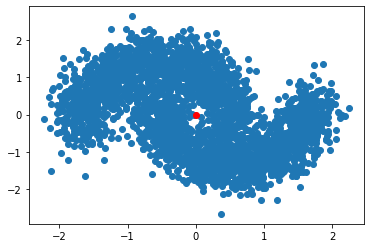

In [232]:
plt.scatter(dfn[0],dfn[1])
plt.scatter(meanx,meany,c = 'r')
plt.scatter(center1[0],center1[1],'g')
plt.scatter(center2[0],center2[1],'g')
meanx,meany

In [34]:
import pandas as pd
import numpy as np
dfy = pd.read_csv('data_predicted_labels.txt',delimiter = '\n',header = None)

In [35]:
dfy.sum()

0    1523
dtype: int64

In [36]:
import matplotlib.pyplot as plt

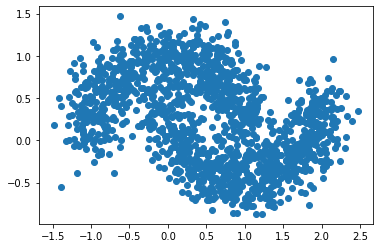

In [37]:
df = pd.read_csv('data.csv',header = None)
df.head()
plt.scatter(df[0:1500][0],df[0:1500][1])

In [38]:
y_treu = np.random.randint(0,2,3000)

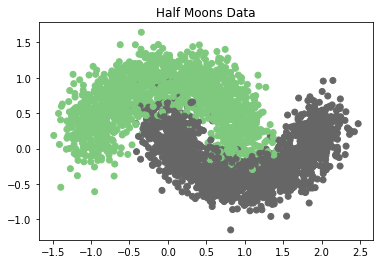

In [43]:
from sklearn import datasets
# Half Moons Data  Generation
np.random.seed(10**7)
data, labels = datasets.make_moons(n_samples=3000, noise=0.2)

plt.scatter(data[:,0],data[:,1],c=labels,cmap=plt.cm.Accent)
plt.title("Half Moons Data")
plt.show()

In [39]:
from sklearn.metrics import normalized_mutual_info_score

In [44]:
normalized_mutual_info_score(y_treu,labels)

3.21144306246902e-07

In [98]:
normalized_mutual_info_score([0,0,1,1,0,0,0,0,1,1,1,],[0,0,1,1,0,0,0,0,1,3,5,])

0.7613531557483283

In [99]:
from sklearn.cluster import Birch

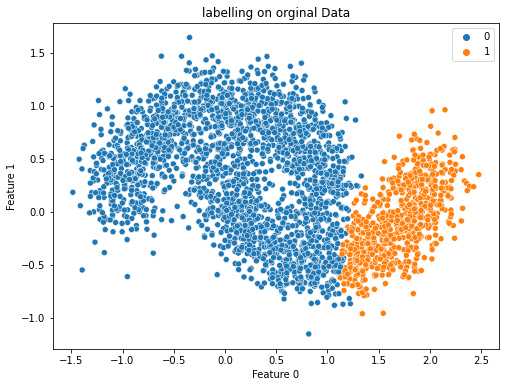

In [223]:
# from sklearn.cluster import SpectralClustering
pred = Birch(n_clusters=2,threshold=0.005,).fit_predict(df)
# pred = model.labels_
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=df, x=0, y=1,hue = pred)
# ax2 = sns.scatterplot(data=X_testr, x=1, y=2,hue = pred)
ax.set(xlabel="Feature 0", ylabel="Feature 1", title="labelling on orginal Data")
# ax.legend(title="Class Labels")
# plt.scatter(meanx,meany,c='r')
plt.show()

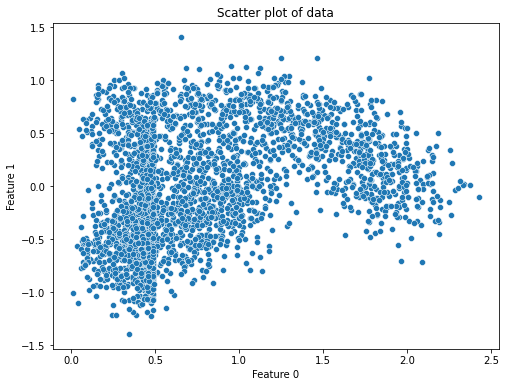

In [246]:
dfr = pd.DataFrame()
meanx = df[0].mean()
meany = df[1].mean()
dfr[0] = np.sqrt(np.abs(df[0]**2 - df[0].mean()**2))
# dfr[0] = np.sqrt(np.abs((df[0]**2 - df[0].mean()**2)+(df[1]**2 - df[1].mean()**2)))
dfr[1] = meany - df[1] 
# dfr[0] =np.sin(df[0])*np.cos(df[1])
# dfr[0] = np.sqrt(np.abs(df[0]**2 - df[0].mean()**2))

plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=dfr, x=0, y=1)
ax.set(xlabel="Feature 0", ylabel="Feature 1", title="Scatter plot of data")
# ax.legend(title="Class Labels")
plt.show()

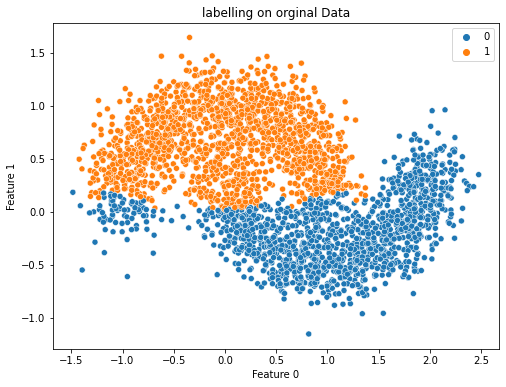

In [278]:
# from sklearn.cluster import SpectralClustering
pred = Birch(n_clusters=2,threshold=0.09478,).fit_predict(dfr)
# pred = model.labels_
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=df, x=0, y=1,hue = pred)
# ax2 = sns.scatterplot(data=X_testr, x=1, y=2,hue = pred)
ax.set(xlabel="Feature 0", ylabel="Feature 1", title="labelling on orginal Data")
# ax.legend(title="Class Labels")
# plt.scatter(meanx,meany,c='r')
plt.show()